In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap


In [2]:
""" Created a functions for line and bar and pie plots
in line_p funtion we are ploting the line graph """
# creating function to create a line graph
def line_p(x_axis, y_axis, name, col):
    plt.plot(x_axis,y_axis, '.-',label= name, color= col)

In [3]:
"""This function will be used for creating multiple plot in subplot with the value index"""
# Creating a function to create a pie chart with pie sub plot
def pie_p(y, label, ind):
    #Ind will be taken from the index of the rows
    plt.subplot(3,2,ind+1)
    plt.pie(y,labels = label, shadow= False,
            autopct="%2.1f%%",textprops={'fontsize': 6})
    plt.title(major["Major"][ind],fontsize = 6.2)

In [4]:
 """Creating a function for Bar plot where we will get the length a and other values
    we are using w for a width in the bar plot for 2nd bar"""
def bar_p(a, value1, value2, lab1, lab2):
    #placing values in barx and barx2 for width and length of a bar graph
    barx= np.arange(len(a))
    barx2= [i+w for i in barx]
    #Ploting 1st bar graph
    plt.bar(barx, value1,w,label=lab1)
    #Ploting 2nd bar graph
    plt.bar(barx2, value2,w,label=lab2)
    plt.xticks(barx,a)

In [5]:
#reading a Data set of a csv file
meat = pd.read_csv("C:/Users/Puneet/OneDrive - University of Hertfordshire/Applied DataScience 1/Assignment/Visualization 1/meat_consumption.csv")

#Droping Unwated Columns
meat= meat.drop(["Flag Codes","FREQUENCY",'INDICATOR'],axis=1)
#filtering data as requied
meat=meat[(meat["LOCATION"] == "GBR") & (meat["MEASURE"] == "THND_TONNE")
          & (meat["TIME"]>= 2005) & (meat["TIME"]<= 2010)]

In [6]:
#meat_sheep = meat[(meat["SUBJECT"]=="SHEEP")]
meat_beef = meat[(meat["SUBJECT"]=="BEEF")] #sub dataframe for Beef
meat_poultry = meat[(meat["SUBJECT"]=="POULTRY")] #sub dataframe for Poultry
meat_pig = meat[(meat["SUBJECT"]=="PIG")] ##sub dataframe for Pig

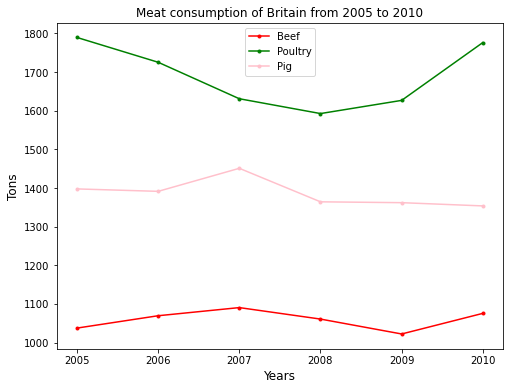

In [12]:
#produsing a line graph  using a line_p function
#line_p(meat_sheep.TIME, meat_sheep.Value, "Sheep","blue")
plt.figure(figsize=(8, 6))
line_p(meat_beef.TIME, meat_beef.Value, "Beef","red")
line_p(meat_poultry.TIME, meat_poultry.Value, "Poultry","green")
line_p(meat_pig.TIME, meat_pig.Value, "Pig","pink")
plt.xlabel("Years", size=12)
plt.ylabel("Tons", size=12)
plt.title("Meat consumption of Britain from 2005 to 2010")
plt.legend()

In [8]:
#reading a Data set of a csv file
major = pd.read_csv("C:/Users/Puneet/OneDrive - University of Hertfordshire/Applied DataScience 1/Assignment/Visualization 1/recent-grads.csv")
# selecting a data where major category is computers & Mathematics
major=(major.loc[major["Major_category"] == "Computers & Mathematics"])
#droping unwanted data's
major=major.drop(['Rank', "Major_category", 'ShareWomen', 'Sample_size',
                  'Unemployment_rate', 'Median', 'P25th', 'P75th',
                  'College_jobs', 'Non_college_jobs', 'Low_wage_jobs',
                  'Full_time_year_round'], axis=1)
major = (major.loc[major["Major_code"]<=2107])
major = (major.loc[major["Major_code"]>2001])
#Re-arranging the data
major = major.sort_values('Major_code', ascending=True)

In [9]:
#creating a new dataforame for Bar plot required coloumns)
employment = major[["Major_code","Employed", "Full_time", "Part_time", "Unemployed", ]]
employment.head()

,Major_code,Employed,Full_time,Part_time,Unemployed
42,2100,28459,26348,4332,2934
53,2101,3257,3204,482,419
20,2102,102087,91485,18726,6884
45,2105,9881,9105,1468,639
81,2106,6509,6289,1030,721


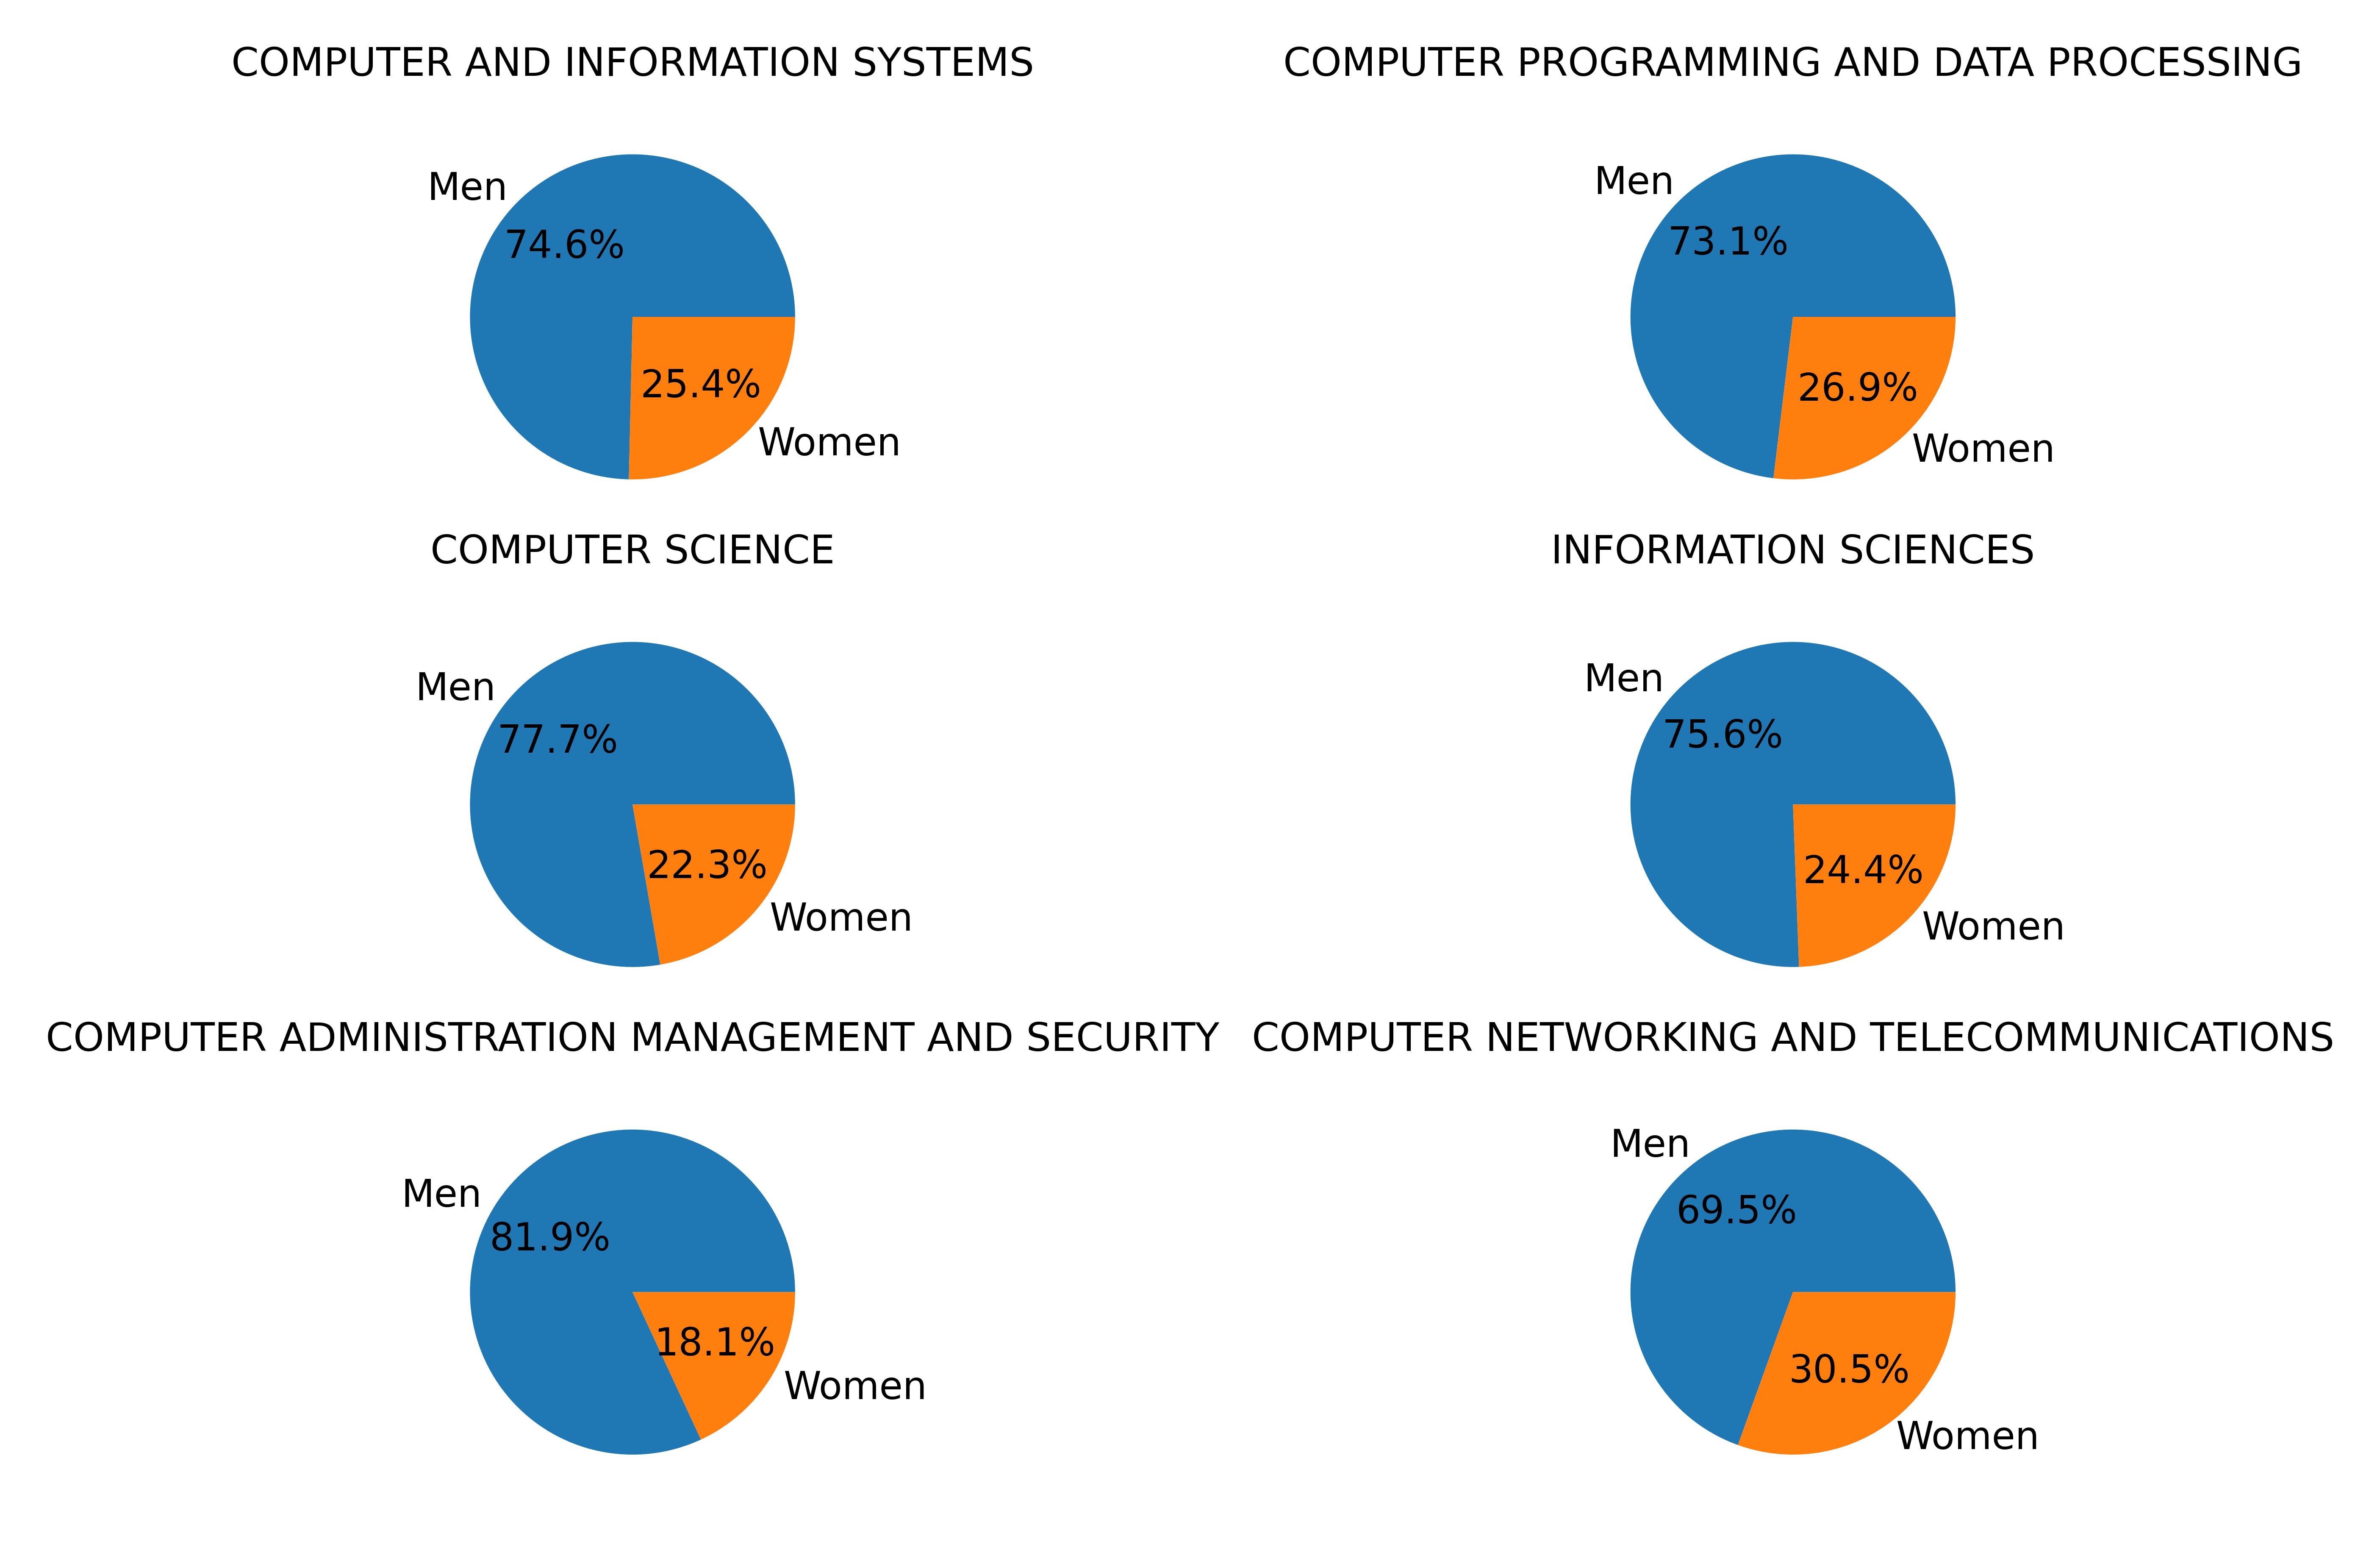

In [10]:
#Selecting only required colums for pie chart
major = major[["Major","Men","Women"]]
#selecting a labels for pie chart
my_label = ["Men", "Women"]
#putting value of major to tit so we can use it in title of the pie chart
tit = major["Major"]
l = range(len(tit))
plt.figure(dpi=1080)
#reseting the index of the major dataform so we can use it in subplots of pie chart
major=major.reset_index()
major = major.drop(["index"],axis=1)
#itterating every index
for ind in major.index:
    #Creating a array so pie can be created based on row values
    y = np.array([major["Men"][ind],major["Women"][ind]])
    #Calling pie_p function
    pie_p(y,my_label,ind)
plt.show()

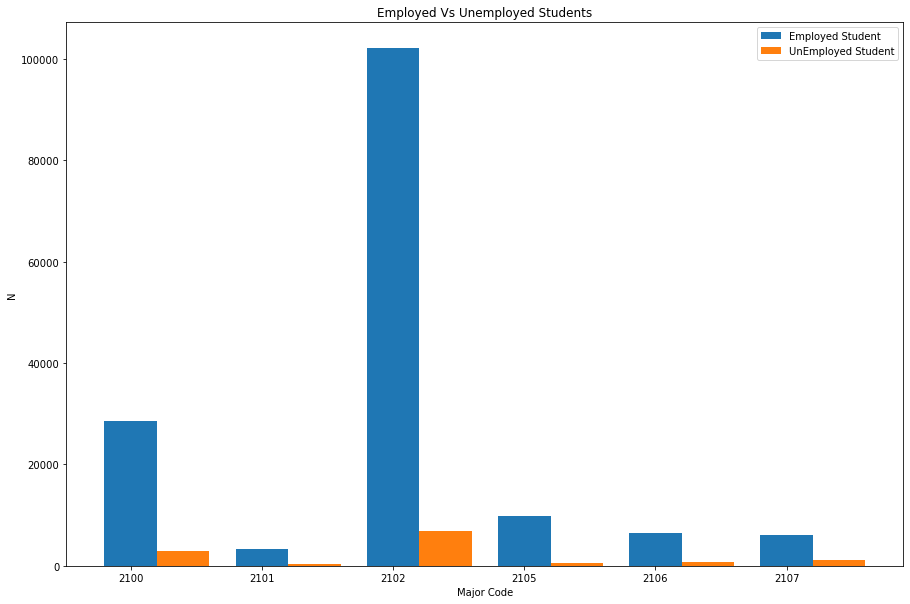

In [11]:
#Assigning a width of the bar plot to w
w=0.4
plt.figure(figsize=(15, 10))
#calling bar_p for creating bar function
bar_p(employment["Major_code"], employment["Employed"],
      employment["Unemployed"],'Employed Student', 'UnEmployed Student')
#Labeling the plot with required data
plt.xlabel("Major Code")
plt.ylabel("N")
plt.title("Employed Vs Unemployed Students")

plt.legend()
plt.show()